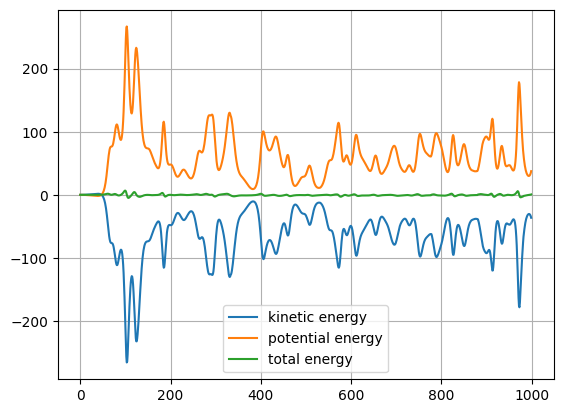

In [42]:
from matplotlib import pyplot as plt

def create_g(ax, filename, title):
    data = [[]]
    frame_kenergy = [0]
    frame_penergy = [0]
    
    with open(filename) as file:
    	for line in file.readlines():
    		# print(len(line))
    		if len(line) == 1:
    			data.append([])
    			frame_kenergy.append(0)
    			frame_penergy.append(0)
    		else:
    			data[-1].append(list(map(float, line.split()))[-2:])
    			frame_kenergy[-1] += data[-1][-1][0]
    			frame_penergy[-1] += data[-1][-1][1]
    
    frame_kenergy = frame_kenergy[1: -1]
    frame_penergy = frame_penergy[1: -1]
    
    mk = 1 # max(frame_kenergy) - frame_kenergy[1]
    mp = 1 # max(frame_penergy) - frame_penergy[1]
    ms = mp + mk
    
    ax.plot([(kenergy - frame_kenergy[1]) / mk for kenergy in frame_kenergy], label='kinetic energy')
    ax.plot([(penergy - frame_penergy[1]) / (2 * mp) for penergy in frame_penergy], label='potential energy')	
    ax.plot([((kenergy - frame_kenergy[1]) + (penergy - frame_penergy[1]) / 2)/ ms for penergy, kenergy in zip(frame_penergy, frame_kenergy)], label='total energy')	
    # ax.title = (title)
    
    ax.grid()
    ax.legend()

create_g(plt, '/home/gibvz/horizons/simulator/euler_noodle/out.txt', 'The first')
plt.show()

In [30]:
from tqdm.notebook import tqdm

def test(argss, workers = 1):
    outputs = []
    busy_count = 0
    
    active_procs = []
    for args in argss:
        active_procs.append(subprocess.Popen(args, stdout=subprocess.PIPE))
        busy_count += 1
        if busy_count >= workers:
            break
    
    with tqdm(total=len(argss)) as pbar:
        running = True
        procs_cheked = [False for _ in range(len(active_procs))]
        while running:
            running = False
            for proc_i in range(len(active_procs)):
                proc = active_procs[proc_i]
                if proc.poll() is None:
                    running = True
                elif not procs_cheked[proc_i]:
                    outputs.append(proc.stdout.read())
                    pbar.update(1)
                    if busy_count < len(argss):
                        active_procs[proc_i] = subprocess.Popen(argss[busy_count], stdout=subprocess.PIPE)
                        busy_count += 1
                        running = True
                    else:
                        procs_cheked[proc_i] = True
                    # print(busy_count)
    return outputs
    

['threads_ex.ipynb',
 'share',
 'blender_prj',
 'bin',
 'include',
 'lib64',
 'outputs',
 'energy_analis.py',
 'some_analisis.ipynb',
 'lib',
 'big_plot.png',
 'simulator',
 'euler.txt',
 '.ipynb_checkpoints',
 'pyvenv.cfg']

In [54]:
import subprocess
import numpy as np
import os
##                         path to app,                      out file name,    dt,   particles, iterations

dts = np.linspace(1e-5, 1e-3, 5)
particles = list(range(100, 1000, 100))

steps = 500

argss = []
outputs = []
prog_path = './simulator/euler_noodle/main.out'
outputs_path = f'outputs{steps}'

if not outputs_path in os.listdir():
    subprocess.run(['mkdir', outputs_path])

for dt in dts:
    for p in particles:
        outputs.append(outputs_path + f'/euler{dt}_{p}.txt')
        argss.append([prog_path, outputs[-1], str(dt), str(p), str(steps)])

test(argss, 4)
# proc = subprocess.run(['./simulator/euler_noodle/main.out', 'euler.txt',  '0.0001',  '100',     '100'     ])
# while proc.
# create_g(plt, 'euler.txt')

  0%|          | 0/45 [00:00<?, ?it/s]

[b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'',
 b'']

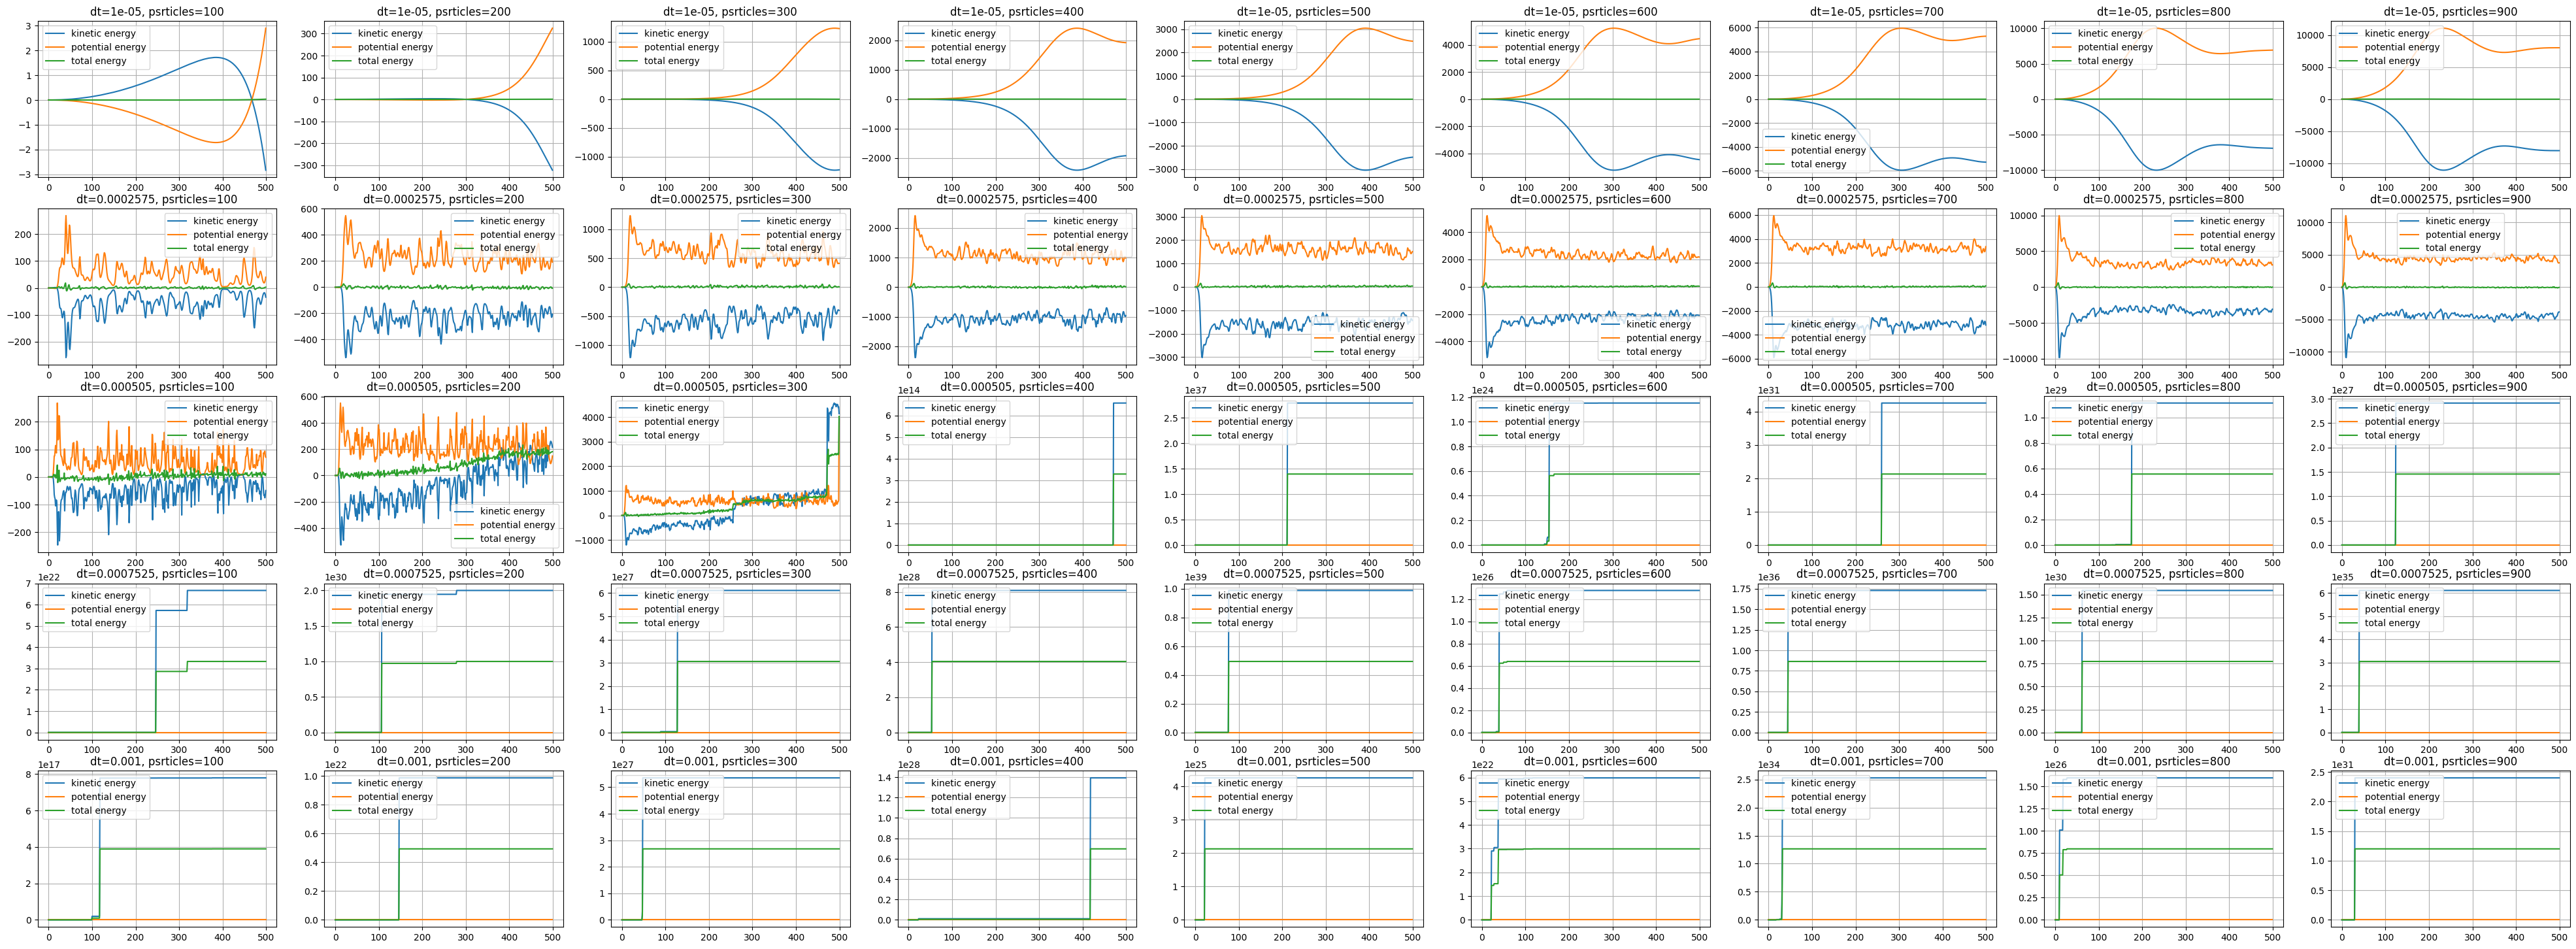

In [55]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(len(dts), len(particles), figsize=(10*len(dts), 2*len(particles)))
# outputs_path = './outputs/'
for dti, dt in enumerate(dts):
    for pi, ps in enumerate(particles):
        create_g(axs[dti, pi], outputs_path + f'/euler{dt}_{ps}.txt', title='')
        axs[dti, pi].set_title(f'dt={dt}, psrticles={ps}')

# axs[0].plot(np.log(x), mean_time)
# #axs[0].title = f'{workers} workers'
# axs[0].set_xlabel('log(N), N - array lenght')
# axs[0].set_ylabel('t, mean time, nanoseconds')
# axs[0].grid()
# # axs[0].savefig(f'bin{len(x)}points{workers}workers_log.jpg', dpi = 1000)

# axs[1].plot(x, mean_time)
# # axs[1].title = f'{workers} workers'
# axs[1].set_xlabel('N, array lenght')
# axs[1].set_ylabel('t, mean time, nanoseconds')
# axs[1].grid()
# # fig.savefig(f'bin{len(x)}points{workers}workers.jpg', dpi = 1000)

plt.savefig(f'big_plot{steps}.png', dpi = 400)
# plt.plot(x[:-4], times)